<a href="https://colab.research.google.com/github/AkshayaRengarajan/An-analysis-on-olympics_history-using-MYSQL/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load and Explore the Data**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/defects_data.csv")
df

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64
...,...,...,...,...,...,...,...,...
995,996,25,Structural,3/1/2024,Component,Minor,Automated Testing,813.14
996,997,23,Functional,3/21/2024,Component,Moderate,Automated Testing,944.07
997,998,17,Structural,1/16/2024,Component,Minor,Automated Testing,401.12
998,999,96,Cosmetic,6/21/2024,Internal,Moderate,Manual Testing,775.63


In [ ]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,defect_id,product_id,repair_cost
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.837000,507.627150
std,288.819436,29.480935,289.623615
min,1.000000,1.000000,10.220000
25%,250.750000,26.000000,270.902500
50%,500.500000,51.000000,506.430000
75%,750.250000,77.000000,759.065000
max,1000.000000,100.000000,999.640000


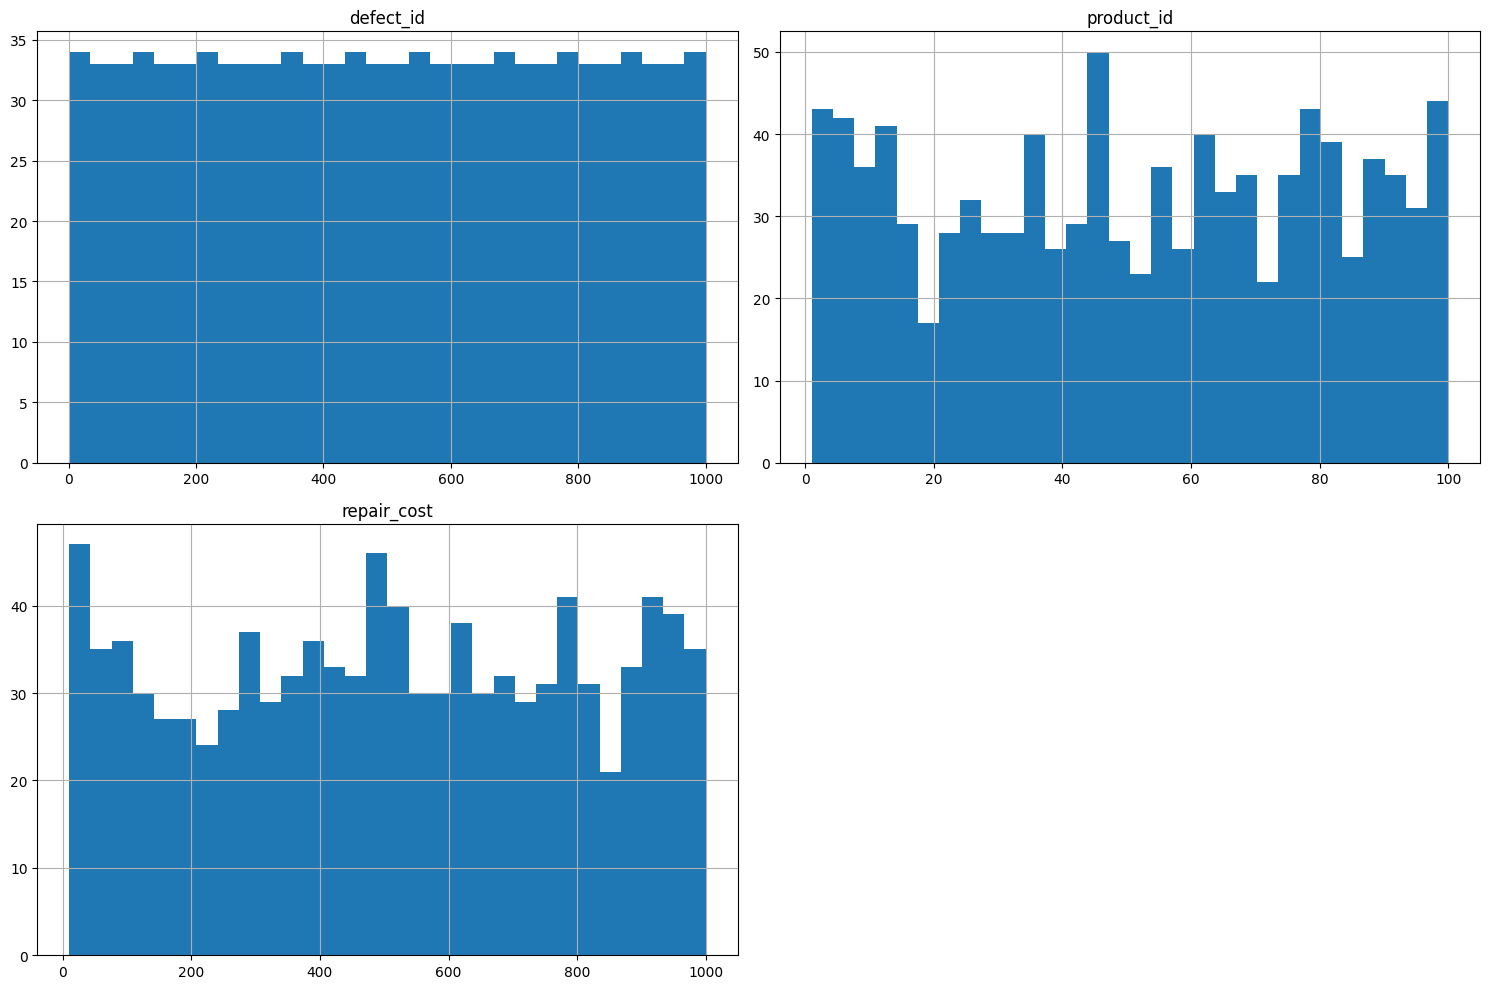

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

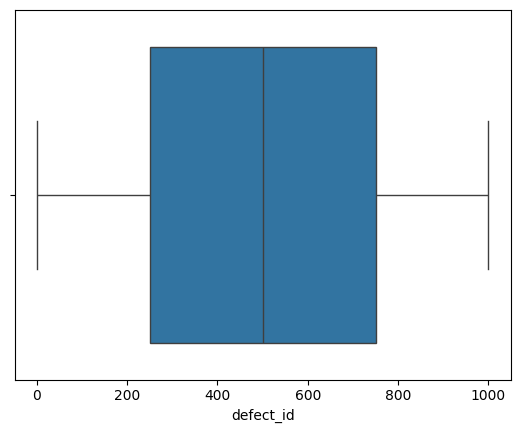

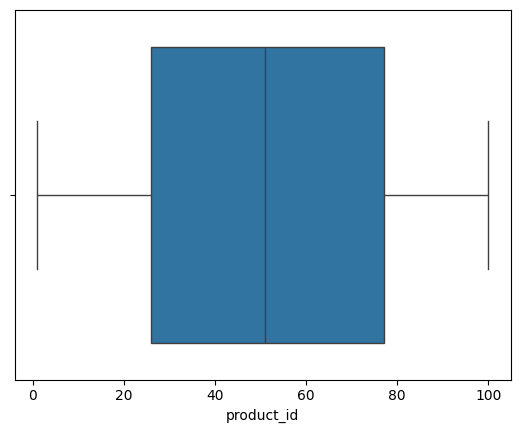

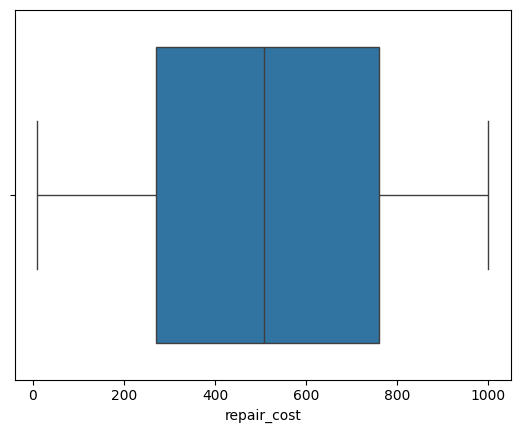

In [ ]:
import seaborn as sns

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
corr_matrix = df.select_dtypes([int, float]).corr()
print(corr_matrix)

             defect_id  product_id  repair_cost
defect_id     1.000000   -0.001343     0.013103
product_id   -0.001343    1.000000     0.004647
repair_cost   0.013103    0.004647     1.000000


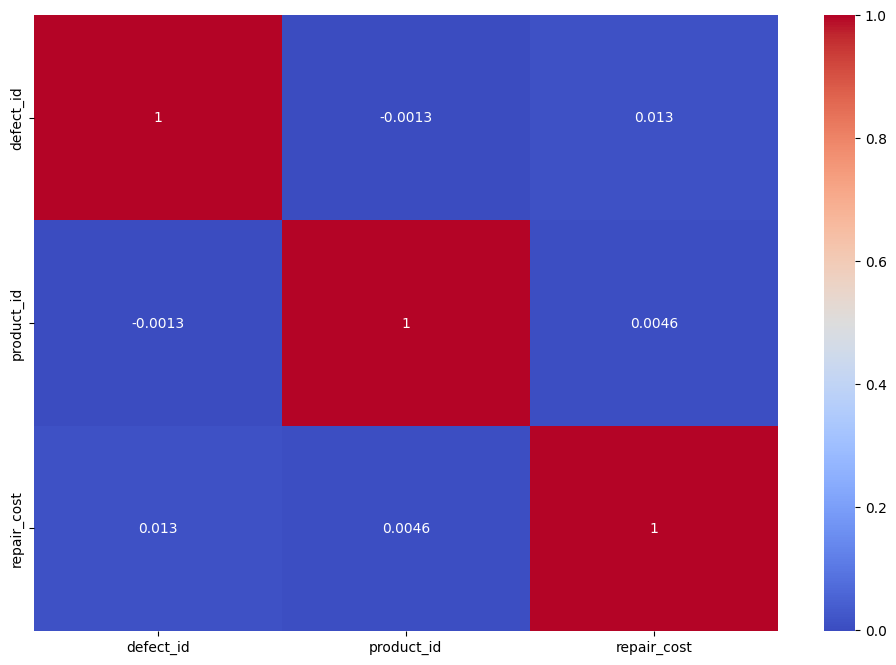

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## **Data Preprocessing**

## Handling Missing Values

In [ ]:
df.isnull().sum()

,0
defect_id,0
product_id,0
defect_type,0
defect_date,0
defect_location,0
severity,0
inspection_method,0
repair_cost,0


In [ ]:
df.duplicated().sum()

0

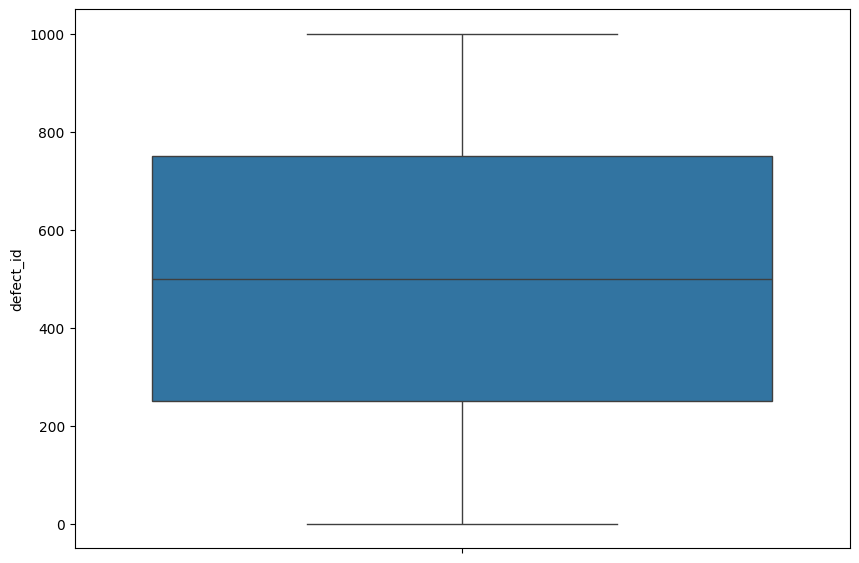

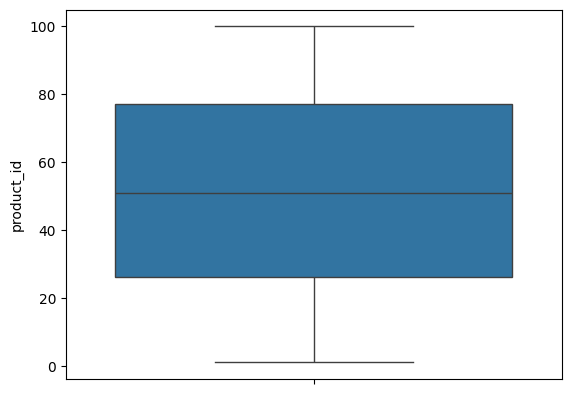

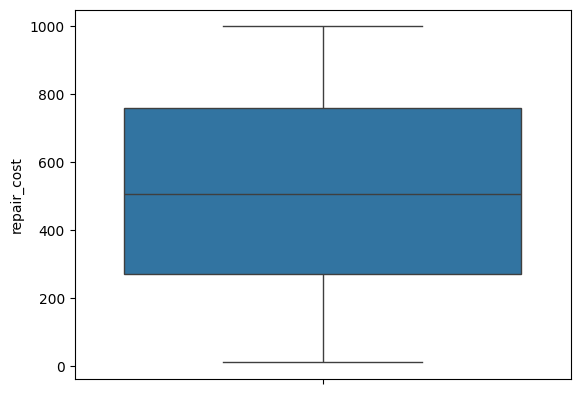

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 7))
for col in df.select_dtypes([int,float]).columns:
  sns.boxplot(df[col])
  plt.show()

## Analysing the data


### 1. Defect Analysis Over Time

# **1. Defect Frequency and Severity Analysis**

### What is the distribution of defect types?

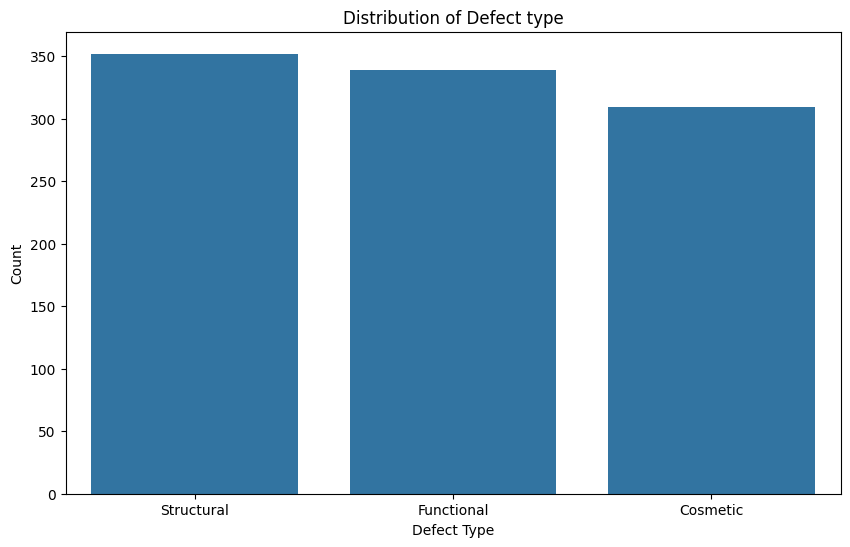

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='defect_type')
sns.set(style="whitegrid")
plt.title('Distribution of Defect type')
plt.xlabel('Defect Type')
plt.ylabel('Count')
plt.show()


## Which defect type is the most common?



In [ ]:
# Calculate the count of each defect type
defect_counts = df['defect_type'].value_counts()
most_common_defect_type = defect_counts.idxmax()
most_common_defect_count = defect_counts.max()

print(f"The most common defect type is: {most_common_defect_type} with a count of: {most_common_defect_count}")

The most common defect type is: Structural with a count of: 352


## How does defect severity vary across different defect types?

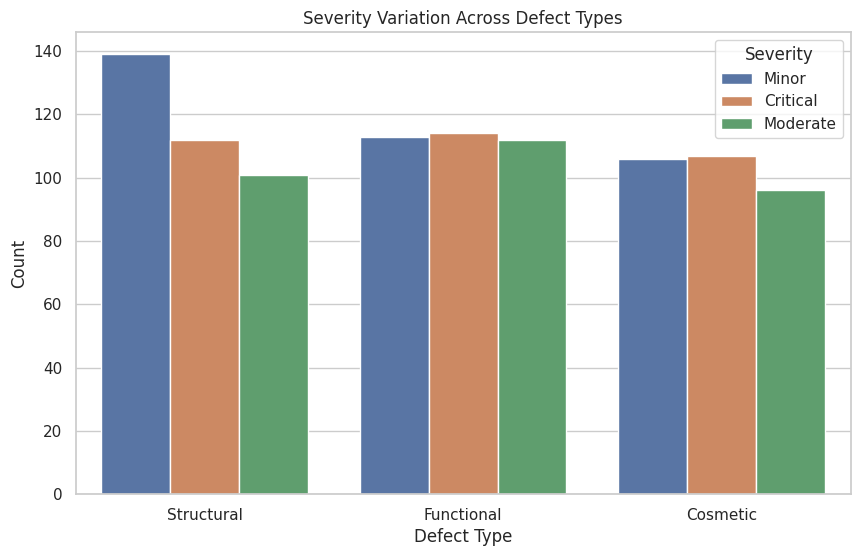

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='defect_type',hue ='severity')
plt.title('Severity Variation Across Defect Types')
plt.xlabel('Defect Type')
plt.ylabel('Count')
plt.legend(title="Severity")
plt.show()


# **Encode Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

obj_cols = df.select_dtypes(object).columns

for col in obj_cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])


In [ ]:
df.dtypes

,0
defect_id,int64
product_id,int64
defect_type,int64
defect_date,int64
defect_location,int64
severity,int64
inspection_method,int64
repair_cost,float64


In [ ]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,2,178,0,1,2,245.47
1,2,6,1,109,0,1,2,26.87
2,3,84,2,37,1,1,0,835.81
3,4,10,1,80,1,0,0,444.47
4,5,14,0,109,0,1,1,823.64


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['repair_cost']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())


   defect_id  product_id  defect_type  defect_date  defect_location  severity  \
0          1          15            2          178                0         1   
1          2           6            1          109                0         1   
2          3          84            2           37                1         1   
3          4          10            1           80                1         0   
4          5          14            0          109                0         1   

   inspection_method  repair_cost  
0                  2    -0.905618  
1                  2    -1.660768  
2                  0     1.133703  
3                  0    -0.218175  
4                  1     1.091662  


##Split  the data


In [ ]:
target_variable = 'repair_cost'
x = df.drop(columns=[target_variable])
y = df[target_variable]


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8)


##Model Selection

In [ ]:
evaluation = {}
training_errors =[]
testing_errors =[]
models=[]

## LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

1.0008690237998605

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9802454786798503

In [ ]:
models.append("LinearRegression")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## DECISIONTREE REGRESSION

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.0

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.9905622908879017

In [ ]:
models.append("DecisionTree")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtrain,ytrain)

Lasso()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

1.0060702866980245

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.975539652042379

In [ ]:
models.append("Lasso")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(xtrain,ytrain)

Ridge()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

1.0008690402224898

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9802389166281212

In [ ]:
models.append("Ridge")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## ELASTICNET REGRESSION

In [ ]:
from sklearn.linear_model import ElasticNet
model =ElasticNet()
model.fit(xtrain,ytrain)

ElasticNet()

In [ ]:
trainpred =model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train



1.0058983771353958

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9772072419667011

In [ ]:
models.append("ElasticNet")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
model.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train


0.5472647279858546

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.4824186298680457

In [ ]:
models.append("KneighborsRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsRegressor()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.8090035176550282

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.2332392125455474

In [ ]:
models.append("KneighborsRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7)
model.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.884345914280065

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.1987336536143212

In [ ]:
models.append("KneighborsRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel = "linear",C=0.6)
model.fit(xtrain,ytrain)

SVR(C=0.6, kernel='linear')

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

1.0046684852765528

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9907669932246523

In [ ]:
models.append("SVR")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
trainpred = model.predict(xtrain)
testpredict = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.1497576225510011

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9907669932246523

In [ ]:
models.append("RandomForestRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## EXTRA TREE REGRESSION

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=300)
model.fit(xtrain,ytrain)

ExtraTreesRegressor(n_estimators=300)

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

1.9488575559193746e-29

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.1389127369262269

In [ ]:
models.append("ExtraTree")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## ADABOOST REGRESSION

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(xtrain,ytrain)

AdaBoostRegressor()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.9763015651030028

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9669066048898272

In [ ]:
models.append("AdaBoostRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## GRADIENTBOOST REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.6681346042078411

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.9750259329932973

In [ ]:
models.append("GradientBoostingRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## XGBOOST REGRESSION

In [ ]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.006945208501441546

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.257051024004391

In [ ]:
models.append("XGBRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## LIGHT GBM REGRESSION

In [ ]:
! pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 7
[LightGBM] [Info] Start training from score -0.003920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor()

In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.2254139387639832

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.1447851083441052

In [ ]:
models.append("LGBMRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

## CATBOOST REGRESSION

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(xtrain,ytrain)

Learning rate set to 0.039525
0:	learn: 1.0014553	total: 48ms	remaining: 47.9s
1:	learn: 0.9990380	total: 49.7ms	remaining: 24.8s
2:	learn: 0.9969343	total: 50.9ms	remaining: 16.9s
3:	learn: 0.9948288	total: 52ms	remaining: 13s
4:	learn: 0.9930851	total: 55.1ms	remaining: 11s
5:	learn: 0.9921046	total: 56.5ms	remaining: 9.36s
6:	learn: 0.9908436	total: 59.2ms	remaining: 8.39s
7:	learn: 0.9896202	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9881072	total: 64.2ms	remaining: 7.07s
9:	learn: 0.9860836	total: 66.3ms	remaining: 6.57s
10:	learn: 0.9844309	total: 68.5ms	remaining: 6.16s
11:	learn: 0.9817662	total: 71.1ms	remaining: 5.85s
12:	learn: 0.9801613	total: 73.6ms	remaining: 5.58s
13:	learn: 0.9785577	total: 77.1ms	remaining: 5.43s
14:	learn: 0.9769040	total: 78.8ms	remaining: 5.17s
15:	learn: 0.9752172	total: 81.6ms	remaining: 5.02s
16:	learn: 0.9729836	total: 84.3ms	remaining: 4.87s
17:	learn: 0.9706249	total: 90.5ms	remaining: 4.93s
18:	learn: 0.9692698	total: 93.3ms	remaining: 4.82s


In [ ]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.19918123732420817

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.1451547970191573

In [ ]:
models.append("CatBoostRegressor")
training_errors.append(mse_train)
testing_errors.append(mse_test)

In [ ]:
evaluation['models'] = models
evaluation['training_errors'] = training_errors
evaluation['testing_errors'] = testing_errors

In [ ]:
import pandas as pd
evaluation = pd.DataFrame(evaluation)

<ipython-input-113-c0e1b767a67d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=45,horizontalalignment="right")


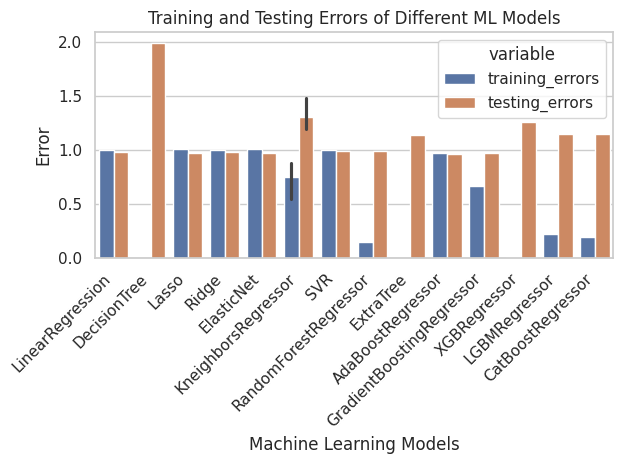

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
bar_plot = sns.barplot(x='models', y='value', hue='variable',
                       data=pd.melt(evaluation, ['models']))
bar_plot.set_title('Training and Testing Errors of Different ML Models')
bar_plot.set_xlabel('Machine Learning Models')
bar_plot.set_ylabel('Error')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=45,horizontalalignment="right")
plt.tight_layout()
plt.show()


## MODEL TRAINING

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)
model.fit(xtrain,ytrain)

RandomForestRegressor()

## MODEL EVALUATION

In [ ]:
trainpred = model.predict(xtrain)
testpredict = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.15161143804097893

In [ ]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

1.1451547970191573